Flights Data Exploration Challenge (My Contribution)

In this challenge, i will explore a real-world dataset containing flights data from the US Department of Transportation 

import relevant libraries

In [57]:
#for dataframe munging
import pandas as pd

#for matematica
import numpy as np
import scipy as sip

#for visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns

#for system setttings
import warnings
import os

#for preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

#for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score

#for modelling
import lightgbm
from lightgbm import LGBMClassifier

!pip install optuna
import optuna

#for model evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


viewing the data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Flights_Data_Analysis_and_Modelling/flights.csv')
data

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.00,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.00,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.00,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.00,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.00,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.00,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.00,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.00,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.00,641,-6,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

In [ ]:
# identifying null or missing data
data.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

Explorative Data Analysis

In [ ]:
# there are 2761 missing data in DepDel15
# checking for the total data entries for all features
data.describe(include='all')

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.00,271940.00,271940.00,271940.00,271940,271940.00,271940,271940,271940,271940.00,271940,271940,271940,271940.00,271940.00,269179.00,271940.00,271940.00,271940.00,271940.00
unique,NaN,NaN,NaN,NaN,16,NaN,70,66,36,NaN,70,66,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,WN,NaN,Hartsfield-Jackson Atlanta International,Chicago,CA,NaN,Hartsfield-Jackson Atlanta International,Chicago,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,57861,NaN,15119,17918,38352,NaN,15014,17873,38164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2013.00,6.98,15.81,3.90,NaN,12744.90,NaN,NaN,NaN,12739.14,NaN,NaN,NaN,1325.50,10.35,0.20,1505.48,6.50,0.22,0.01
std,0.00,1.98,8.80,1.99,NaN,1501.20,NaN,NaN,NaN,1502.57,NaN,NaN,NaN,470.75,35.67,0.40,493.20,38.23,0.41,0.10
min,2013.00,4.00,1.00,1.00,NaN,10140.00,NaN,NaN,NaN,10140.00,NaN,NaN,NaN,1.00,-63.00,0.00,1.00,-75.00,0.00,0.00
25%,2013.00,5.00,8.00,2.00,NaN,11292.00,NaN,NaN,NaN,11292.00,NaN,NaN,NaN,920.00,-4.00,0.00,1119.00,-11.00,0.00,0.00
50%,2013.00,7.00,16.00,4.00,NaN,12892.00,NaN,NaN,NaN,12892.00,NaN,NaN,NaN,1320.00,-1.00,0.00,1529.00,-3.00,0.00,0.00
75%,2013.00,9.00,23.00,6.00,NaN,14057.00,NaN,NaN,NaN,14057.00,NaN,NaN,NaN,1725.00,9.00,0.00,1918.00,10.00,0.00,0.00


In [ ]:
# since there are 271940 entries
percentage_of_null = (data.isnull().sum()/data.value_counts().sum())*100
print('The percentage of the missing data in the dataset in the feature',percentage_of_null)

The percentage of the missing data in the dataset in the feature Year                0.00
Month               0.00
DayofMonth          0.00
DayOfWeek           0.00
Carrier             0.00
OriginAirportID     0.00
OriginAirportName   0.00
OriginCity          0.00
OriginState         0.00
DestAirportID       0.00
DestAirportName     0.00
DestCity            0.00
DestState           0.00
CRSDepTime          0.00
DepDelay            0.00
DepDel15            1.03
CRSArrTime          0.00
ArrDelay            0.00
ArrDel15            0.00
Cancelled           0.00
dtype: float64


A very low percentage which means filing with zeros or mean would not really be a problem

In [ ]:
data.nunique()

Year                    1
Month                   7
DayofMonth             31
DayOfWeek               7
Carrier                16
OriginAirportID        70
OriginAirportName      70
OriginCity             66
OriginState            36
DestAirportID          70
DestAirportName        70
DestCity               66
DestState              36
CRSDepTime           1208
DepDelay              526
DepDel15                2
CRSArrTime           1310
ArrDelay              561
ArrDel15                2
Cancelled               2
dtype: int64

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



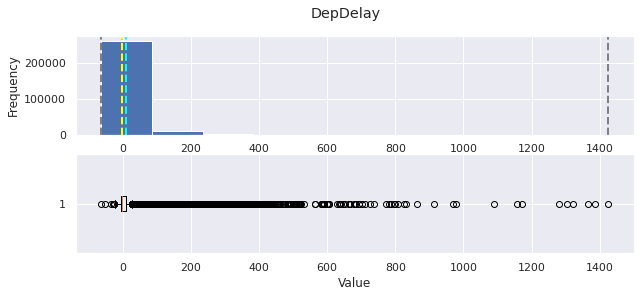

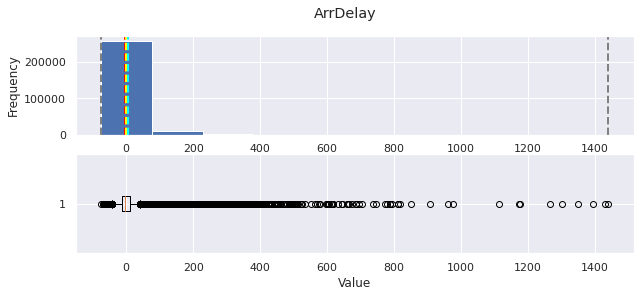

In [ ]:
# checking for outliers
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(data[col])

#### There are outliers at the lower and upper end of each distribution, it is safe to trim by 1st and 90th percentile

DepDelay 
Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay 
Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



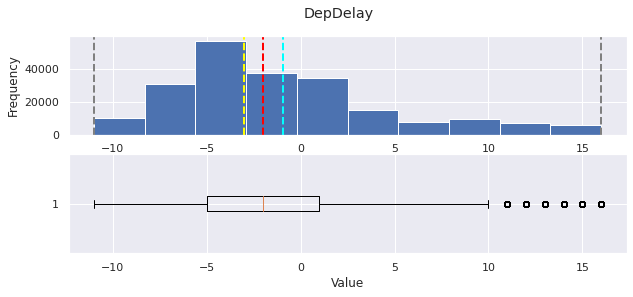

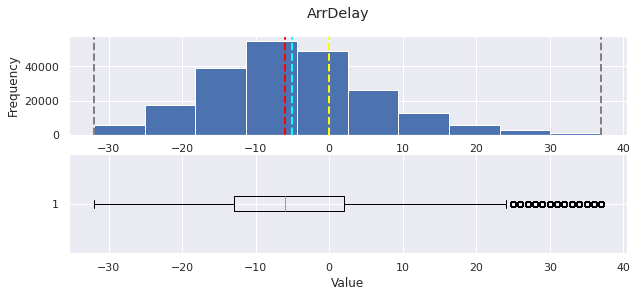

In [ ]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = data.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = data.ArrDelay.quantile(0.90)
data = data[data.ArrDelay < ArrDelay_90pcntile]
data = data[data.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = data.DepDelay.quantile(0.01)
DepDelay_90pcntile = data.DepDelay.quantile(0.90)
data = data[data.DepDelay < DepDelay_90pcntile]
data = data[data.DepDelay > DepDelay_01pcntile]

# View the revised distributions
for col in delayFields:
    show_distribution(data[col])

The DepDelay and ArrDelay contains real time quantified observatiion. Can we say the outliers are quite due to error?

In [ ]:
# view summary statistics for the numeric fields
data.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.00,214397.00,214397.00,214397.00,214397.00,214397.00,214397.00,214397.00,211636.00,214397.00,214397.00,214397.00,214397.00
mean,2013.00,7.02,15.79,3.90,12757.83,12726.28,1278.22,-0.92,0.02,1461.41,-5.03,0.07,0.01
std,0.00,2.01,8.86,2.00,1510.06,1506.25,469.44,5.71,0.13,485.68,11.42,0.25,0.11
min,2013.00,4.00,1.00,1.00,10140.00,10140.00,1.00,-11.00,0.00,1.00,-32.00,0.00,0.00
25%,2013.00,5.00,8.00,2.00,11292.00,11292.00,850.00,-5.00,0.00,1054.00,-13.00,0.00,0.00
50%,2013.00,7.00,16.00,4.00,12892.00,12892.00,1235.00,-2.00,0.00,1445.00,-6.00,0.00,0.00
75%,2013.00,9.00,23.00,6.00,14100.00,14057.00,1655.00,1.00,0.00,1845.00,2.00,0.00,0.00
max,2013.00,10.00,31.00,7.00,15376.00,15376.00,2359.00,16.00,1.00,2359.00,37.00,1.00,1.00


OriginAirportID and DestAirportID seems to be pretty close. However they will be insignificant in modelling.

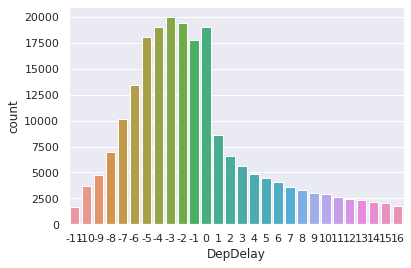

In [ ]:
# To determine the distribution of DepDelay and ArrDelay 
# For DepDelay 
sns.countplot(data['DepDelay'])

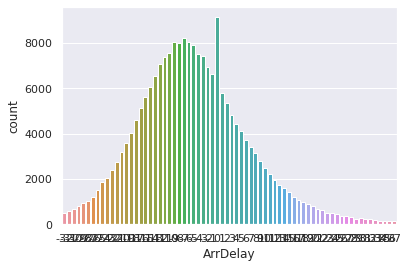

In [ ]:
# For ArrDelay
sns.countplot(data['ArrDelay'])

In [ ]:
# Average(mean)departure delay
mean_departure = data['DepDelay'].mean()
print('The mean departure delays :',mean_departure)

The mean departure delays : -0.9216920012873314


In [ ]:
# Average(mean)arrival delay
mean_arrival = data['ArrDelay'].mean()
print('The mean arrival delays :',mean_arrival)

The mean arrival delays : -5.030275610199769


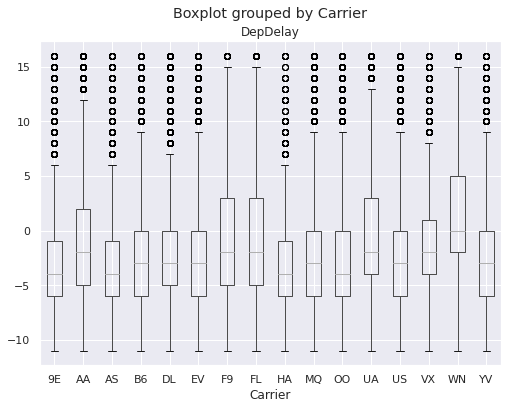

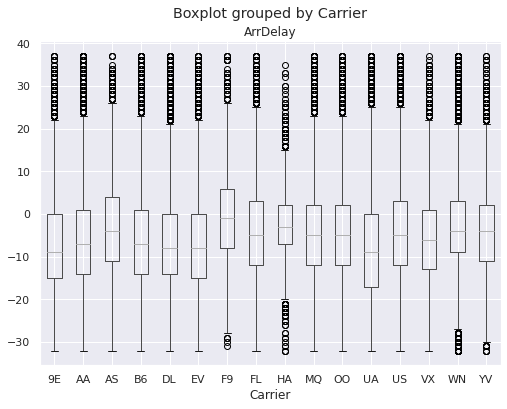

In [ ]:
# To visualize how carriers
for col in delayFields:
    data.boxplot( by='Carrier',column=col,figsize=(8,6))

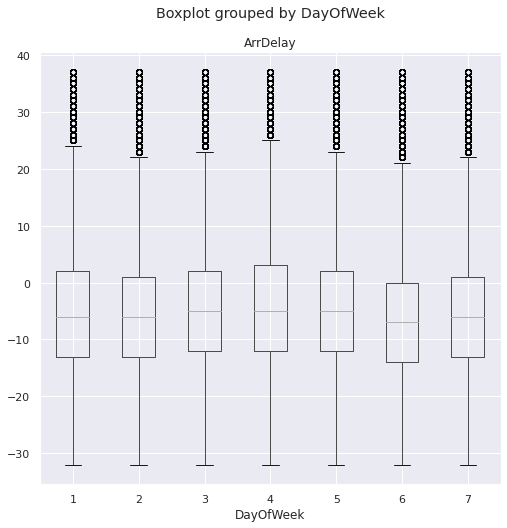

In [ ]:
# To visualize the notable difference in arrival delays for different days of the week
data.boxplot( by='DayOfWeek',column=col,figsize=(8,8))

,DepDelay
OriginAirportName,
Chicago Midway International,2.37
Dallas Love Field,2.15
William P Hobby,1.56
Metropolitan Oakland International,0.96
Denver International,0.81
...,...
Memphis International,-2.96
Tucson International,-2.99
Ted Stevens Anchorage International,-3.15


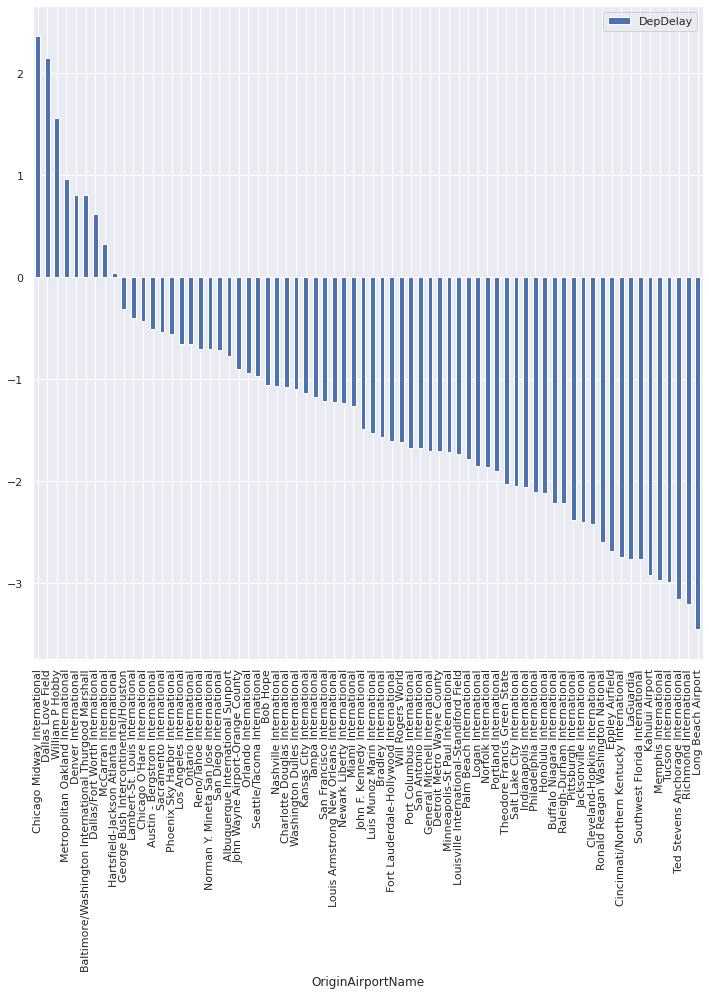

In [ ]:
# Which departure airport has the highest average departure delay?
departure_airport_group = data.groupby(data['OriginAirportName'])

mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays

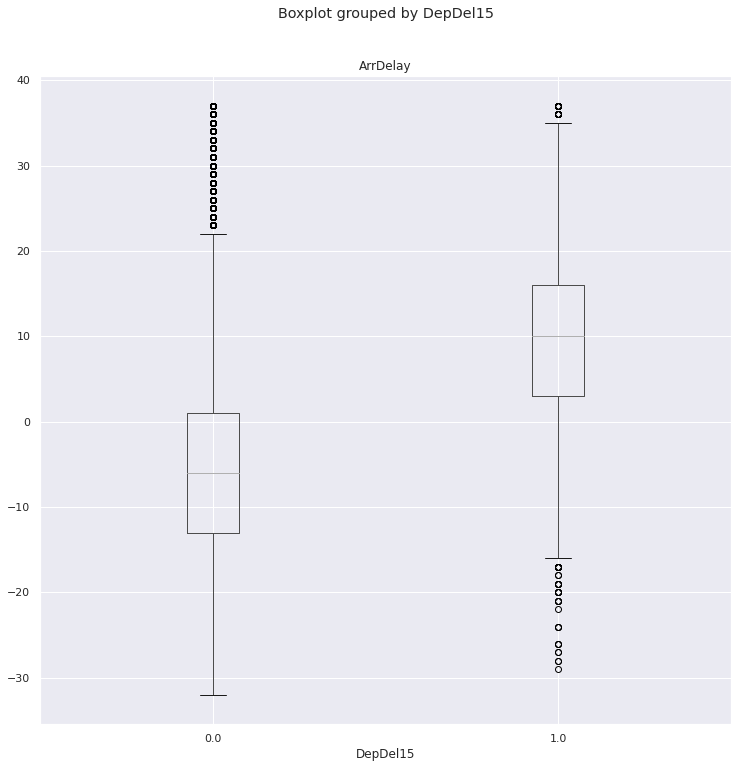

In [ ]:
# Do late departures tend to result in longer arrival delays than on-time departures?
data.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

In [ ]:
# Which route has the highest average arrival delay
routes = pd.Series(data['OriginAirportName'] + ' > ' + data['DestAirportName'])
data1 = pd.concat([data, routes.rename("Route")], axis=1)
route_group = data1.groupby(data1.Route)
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,24.50
Cleveland-Hopkins International > Palm Beach International,18.00
John F. Kennedy International > Louisville International-Standiford Field,18.00
Cleveland-Hopkins International > Philadelphia International,12.80
Memphis International > Denver International,9.76
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.00
Eppley Airfield > LaGuardia,-20.75
Denver International > Kahului Airport,-22.67


In [ ]:
# Which route has the highest average arrival delay?
route_group = data1.groupby(data1.Route)
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,24.50
Cleveland-Hopkins International > Palm Beach International,18.00
John F. Kennedy International > Louisville International-Standiford Field,18.00
Cleveland-Hopkins International > Philadelphia International,12.80
Memphis International > Denver International,9.76
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.00
Eppley Airfield > LaGuardia,-20.75
Denver International > Kahului Airport,-22.67


In [ ]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

Feature Engineering

In [4]:
#imputing the missing datas by the columns means value
SI = SimpleImputer(missing_values=np.nan,strategy='mean')
data['DepDel15'] = SI.fit_transform(data[['DepDel15']])

In [5]:
data.isnull().sum().any()

False

In [6]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

In [7]:
#segmenting the dataset
features = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
            'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
            'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
            'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
            'ArrDel15']
label = ['Cancelled']

num_features = ['DepDelay','ArrDelay']
cat_features = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
                'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
                'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
                'CRSDepTime', 'DepDel15', 'CRSArrTime', 'ArrDel15']

cnt_num_features = []
dis_num_features = ['DepDelay','ArrDelay']

ord_cat_features = []
nom_cat_features = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
                    'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
                    'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
                    'CRSDepTime', 'DepDel15', 'CRSArrTime', 'ArrDel15']

date_features = ['Year','Month','DayofMonth','DayOfWeek']
time_features = ['CRSDepTime','CRSArrTime']

del15_cols = ['ArrDel15','DepDel15']
del_cols = ['DepDelay','ArrDelay']

city_cols = ['OriginCity','DestCity']
state_cols = ['OriginState','DestState']

id_cols = ['OriginAirportID','DestAirportID']
name_cols = ['OriginAirportName','DestAirportName']

In [8]:
data['CRSDepTime_min'] = data['CRSDepTime'].astype(str).str[-2:] 
data['CRSArrTime_min'] = data['CRSArrTime'].astype(str).str[-2:]

data['CRSDepTime_hr'] = data['CRSDepTime'].astype(str).str[:-2]
data['CRSArrTime_hr'] = data['CRSArrTime'].astype(str).str[:-2]

In [9]:
data[name_cols].head(20)

,OriginAirportName,DestAirportName
0,Tampa International,John F. Kennedy International
1,Pittsburgh International,Chicago Midway International
2,Seattle/Tacoma International,Ronald Reagan Washington National
3,Chicago O'Hare International,Cleveland-Hopkins International
4,Norfolk International,Hartsfield-Jackson Atlanta International
5,John F. Kennedy International,San Francisco International
6,Metropolitan Oakland International,William P Hobby
7,Washington Dulles International,Richmond International
8,Chicago O'Hare International,Dallas/Fort Worth International
9,John F. Kennedy International,Los Angeles International


In [10]:
#for name_cols
LE = LabelEncoder()
data['OriginAirportName'] = LE.fit_transform(data['OriginAirportName'])
name_mapping = dict(zip(LE.classes_, range(len(LE.classes_))))

In [11]:
name_mapping

{'Albuquerque International Sunport': 0,
 'Austin - Bergstrom International': 1,
 'Baltimore/Washington International Thurgood Marshall': 2,
 'Bob Hope': 3,
 'Bradley International': 4,
 'Buffalo Niagara International': 5,
 'Charlotte Douglas International': 6,
 'Chicago Midway International': 7,
 "Chicago O'Hare International": 8,
 'Cincinnati/Northern Kentucky International': 9,
 'Cleveland-Hopkins International': 10,
 'Dallas Love Field': 11,
 'Dallas/Fort Worth International': 12,
 'Denver International': 13,
 'Detroit Metro Wayne County': 14,
 'Eppley Airfield': 15,
 'Fort Lauderdale-Hollywood International': 16,
 'General Mitchell International': 17,
 'George Bush Intercontinental/Houston': 18,
 'Hartsfield-Jackson Atlanta International': 19,
 'Honolulu International': 20,
 'Indianapolis International': 21,
 'Jacksonville International': 22,
 'John F. Kennedy International': 23,
 'John Wayne Airport-Orange County': 24,
 'Kahului Airport': 25,
 'Kansas City International': 26,
 'L

In [12]:
#apply name_mapping for DesAirportName
data['DestAirportName'] = data['DestAirportName'].apply(lambda x: name_mapping[x])

In [13]:
#for id cols
data['OriginAirportID'] = LE.fit_transform(data['OriginAirportID'])
id_mapping = dict(zip(LE.classes_, range(len(LE.classes_))))

In [14]:
id_mapping

{10140: 0,
 10299: 1,
 10397: 2,
 10423: 3,
 10529: 4,
 10693: 5,
 10721: 6,
 10792: 7,
 10800: 8,
 10821: 9,
 11042: 10,
 11057: 11,
 11066: 12,
 11193: 13,
 11259: 14,
 11278: 15,
 11292: 16,
 11298: 17,
 11433: 18,
 11618: 19,
 11697: 20,
 12173: 21,
 12191: 22,
 12264: 23,
 12266: 24,
 12339: 25,
 12451: 26,
 12478: 27,
 12889: 28,
 12892: 29,
 12953: 30,
 12954: 31,
 13198: 32,
 13204: 33,
 13232: 34,
 13244: 35,
 13303: 36,
 13342: 37,
 13487: 38,
 13495: 39,
 13796: 40,
 13830: 41,
 13851: 42,
 13871: 43,
 13891: 44,
 13930: 45,
 13931: 46,
 14027: 47,
 14057: 48,
 14100: 49,
 14107: 50,
 14122: 51,
 14307: 52,
 14492: 53,
 14524: 54,
 14570: 55,
 14635: 56,
 14679: 57,
 14683: 58,
 14730: 59,
 14747: 60,
 14771: 61,
 14831: 62,
 14843: 63,
 14869: 64,
 14893: 65,
 14908: 66,
 15016: 67,
 15304: 68,
 15376: 69}

In [15]:
#apply id_mapping for DestAirportID
data['DestAirportID'] = data['DestAirportID'].apply(lambda x: id_mapping[x])

In [16]:
#for city_cols
data['OriginCity'] = LE.fit_transform(data['OriginCity'])
city_mapping = dict(zip(LE.classes_, range(len(LE.classes_))))

In [17]:
city_mapping

{'Albuquerque': 0,
 'Anchorage': 1,
 'Atlanta': 2,
 'Austin': 3,
 'Baltimore': 4,
 'Boston': 5,
 'Buffalo': 6,
 'Burbank': 7,
 'Charlotte': 8,
 'Chicago': 9,
 'Cincinnati': 10,
 'Cleveland': 11,
 'Columbus': 12,
 'Dallas': 13,
 'Dallas/Fort Worth': 14,
 'Denver': 15,
 'Detroit': 16,
 'Fort Lauderdale': 17,
 'Fort Myers': 18,
 'Hartford': 19,
 'Honolulu': 20,
 'Houston': 21,
 'Indianapolis': 22,
 'Jacksonville': 23,
 'Kahului': 24,
 'Kansas City': 25,
 'Las Vegas': 26,
 'Long Beach': 27,
 'Los Angeles': 28,
 'Louisville': 29,
 'Memphis': 30,
 'Miami': 31,
 'Milwaukee': 32,
 'Minneapolis': 33,
 'Nashville': 34,
 'New Orleans': 35,
 'New York': 36,
 'Newark': 37,
 'Norfolk': 38,
 'Oakland': 39,
 'Oklahoma City': 40,
 'Omaha': 41,
 'Ontario': 42,
 'Orlando': 43,
 'Philadelphia': 44,
 'Phoenix': 45,
 'Pittsburgh': 46,
 'Portland': 47,
 'Providence': 48,
 'Raleigh/Durham': 49,
 'Reno': 50,
 'Richmond': 51,
 'Sacramento': 52,
 'Salt Lake City': 53,
 'San Antonio': 54,
 'San Diego': 55,
 'San 

In [18]:
#apply city_mapping on DestCity
data['DestCity'] = data['DestCity'].apply(lambda x: city_mapping[x])

In [19]:
#for state_cols
data['OriginState'] = LE.fit_transform(data['OriginState'])
state_mapping = dict(zip(LE.classes_, range(len(LE.classes_))))

In [20]:
state_mapping

{'AK': 0,
 'AZ': 1,
 'CA': 2,
 'CO': 3,
 'CT': 4,
 'DC': 5,
 'FL': 6,
 'GA': 7,
 'HI': 8,
 'IL': 9,
 'IN': 10,
 'KY': 11,
 'LA': 12,
 'MA': 13,
 'MD': 14,
 'MI': 15,
 'MN': 16,
 'MO': 17,
 'NC': 18,
 'NE': 19,
 'NJ': 20,
 'NM': 21,
 'NV': 22,
 'NY': 23,
 'OH': 24,
 'OK': 25,
 'OR': 26,
 'PA': 27,
 'PR': 28,
 'RI': 29,
 'TN': 30,
 'TX': 31,
 'UT': 32,
 'VA': 33,
 'WA': 34,
 'WI': 35}

In [21]:
#apply state_mapping on DestState
data['DestState'] = data['DestState'].apply(lambda x: state_mapping[x])

In [22]:
data = data.drop('Year',axis = 1)

In [23]:
data['Carrier'] = LE.fit_transform(data['Carrier'])

In [24]:
data['CarrierDelay1'] = data.groupby(['DepDelay'])['Carrier'].transform('nunique')
data['CarrierDelay2'] = data.groupby(['ArrDelay'])['Carrier'].transform('nunique')

data['CarrierMonth'] = data.groupby(['Month'])['Carrier'].transform('mean')
data['CarrierDayMonth'] = data.groupby(['DayofMonth'])['Carrier'].transform('mean')
data['CarrierDayWeek'] = data.groupby(['DayOfWeek'])['Carrier'].transform('mean')

In [25]:
data['TotalDelay'] = data[['DepDelay','ArrDelay']].sum(axis=1)
data['TotalDel15'] = data[['DepDel15','ArrDel15']].sum(axis=1)

In [26]:
data['CarrierCityO'] = data.groupby(['OriginCity'])['Carrier'].transform('mean')
data['CarrierStateO'] = data.groupby(['OriginState'])['Carrier'].transform('mean')
data['CarrierCityD'] = data.groupby(['DestCity'])['Carrier'].transform('mean')
data['CarrierStateD'] = data.groupby(['DestState'])['Carrier'].transform('mean')

In [27]:
data['CarrierDelay'] = (data['CarrierDelay1'] + data['CarrierDelay2'])/2

data['DestAirport'] = data.groupby(['DepDelay'])['DestAirportName'].transform('mean')
data['ArrAirport'] = data.groupby(['ArrDelay'])['OriginAirportName'].transform('mean')

In [28]:
data

,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,...,CarrierDayWeek,TotalDelay,TotalDel15,CarrierCityO,CarrierStateO,CarrierCityD,CarrierStateD,CarrierDelay,DestAirport,ArrAirport
0,9,16,1,4,68,63,62,6,27,23,...,8.12,17,0.00,8.45,6.93,5.33,5.58,16.00,31.88,31.40
1,9,23,1,14,51,49,46,27,34,7,...,8.12,25,1.00,8.27,9.47,8.81,8.81,16.00,31.78,30.10
2,9,7,6,2,60,61,60,34,15,55,...,8.11,-10,0.00,6.15,6.15,7.84,7.84,16.00,31.13,31.86
3,7,22,1,10,45,8,9,9,10,10,...,8.12,68,2.00,8.79,8.79,7.94,6.56,16.00,31.02,30.70
4,5,16,4,4,46,42,38,33,2,19,...,8.17,-10,0.00,8.66,7.11,5.35,5.35,16.00,31.72,31.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,9,20,5,13,33,45,43,6,29,31,...,8.15,19,1.00,7.78,6.93,8.75,9.85,16.00,32.13,30.50
271936,4,19,5,7,2,19,2,7,20,16,...,8.15,85,2.00,5.31,5.31,7.50,6.89,15.50,31.68,28.36
271937,10,26,6,14,22,69,21,31,9,2,...,8.11,45,2.00,9.87,7.26,10.70,10.70,16.00,31.57,30.86
271938,5,7,2,8,41,25,24,8,21,20,...,8.23,-11,0.00,7.88,7.85,7.77,7.84,16.00,30.66,31.71


In [29]:
data[state_cols].head(6)

,OriginState,DestState
0,6,23
1,27,9
2,34,5
3,9,24
4,33,7
5,23,2


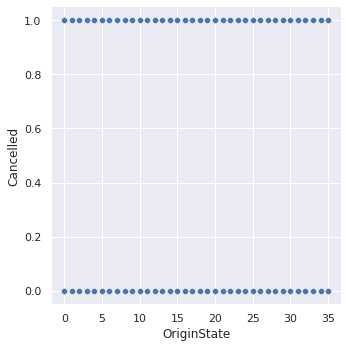

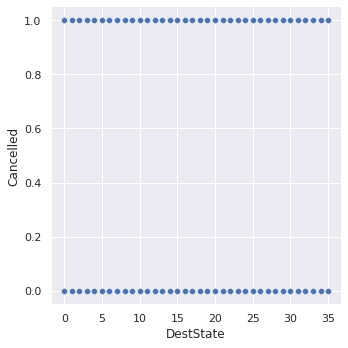

In [ ]:
for state in state_cols:
  ax = sns.relplot(
    data=data, x=state, y="Cancelled",kind="scatter")

In [ ]:
data[city_cols].head()

,OriginCity,DestCity
0,62,36
1,46,9
2,60,64
4,38,2
6,39,21


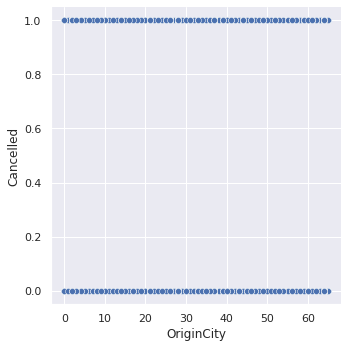

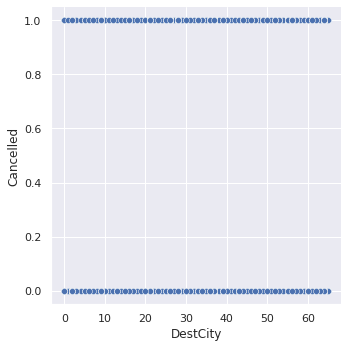

In [ ]:
for city in city_cols:
  ax = sns.relplot(
    data=data, x=city, y="Cancelled",kind="scatter")

In [ ]:
data[state_cols].head()

,OriginState,DestState
0,6,23
1,27,9
2,34,5
4,33,7
6,2,31


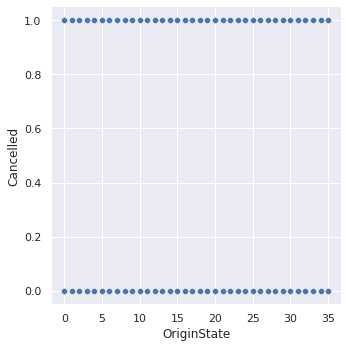

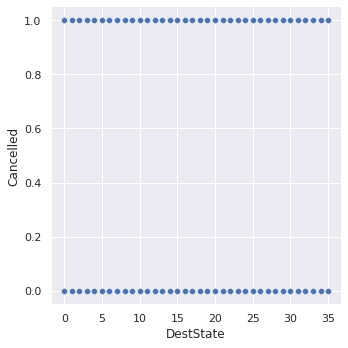

In [ ]:
for state in state_cols:
  ax = sns.relplot(
    data=data, x=state, y="Cancelled",kind="scatter")

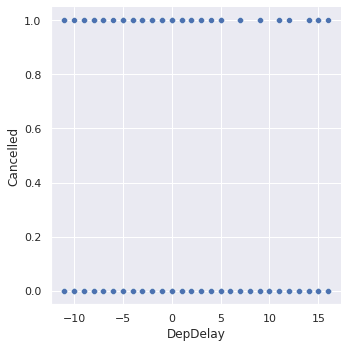

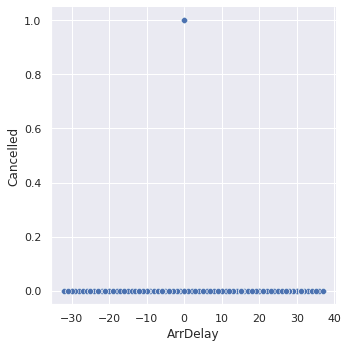

In [ ]:
for Del in del_cols:
  ax = sns.relplot(
    data=data, x=Del, y="Cancelled",kind="scatter")

In [30]:
data[del_cols].describe()

,DepDelay,ArrDelay
count,271940.00,271940.00
mean,10.35,6.50
std,35.67,38.23
min,-63.00,-75.00
25%,-4.00,-11.00
50%,-1.00,-3.00
75%,9.00,10.00
max,1425.00,1440.00


In [31]:
MM = MinMaxScaler()

In [32]:
for Del in del_cols:
  data[Del] = MM.fit_transform(data[Del].values.reshape(-1,1))

In [33]:
data.describe()

,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,...,CarrierDayWeek,TotalDelay,TotalDel15,CarrierCityO,CarrierStateO,CarrierCityD,CarrierStateD,CarrierDelay,DestAirport,ArrAirport
count,271940.00,271940.00,271940.00,271940.00,271940.00,271940.00,271940.00,271940.00,271940.00,271940.00,...,271940.00,271940.00,271940.00,271940.00,271940.00,271940.00,271940.00,271940.00,271940.00,271940.00
mean,6.98,15.81,3.90,8.14,31.61,31.40,29.48,14.83,31.54,31.41,...,8.14,16.85,0.42,8.14,8.14,8.14,8.14,15.82,31.41,31.40
std,1.98,8.80,1.99,4.85,19.43,19.24,19.18,10.86,19.44,19.30,...,0.06,72.77,0.75,2.38,1.85,2.38,1.85,0.89,1.00,1.12
min,4.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,8.02,-86.00,0.00,2.65,4.09,2.64,4.18,1.00,2.00,1.00
25%,5.00,8.00,2.00,4.00,16.00,14.00,13.00,5.00,16.00,14.00,...,8.11,-15.00,0.00,6.15,6.93,6.09,6.89,16.00,31.04,31.20
50%,7.00,16.00,4.00,9.00,29.00,30.00,28.00,13.00,29.00,30.00,...,8.15,-4.00,0.00,8.67,8.12,8.75,8.18,16.00,31.45,31.61
75%,9.00,23.00,6.00,12.00,48.00,48.00,45.00,24.00,48.00,48.00,...,8.17,17.00,1.00,9.87,9.87,9.83,9.85,16.00,31.78,31.86
max,10.00,31.00,7.00,15.00,69.00,69.00,65.00,35.00,69.00,69.00,...,8.23,2854.00,2.00,12.97,11.62,13.16,11.58,16.00,69.00,69.00


In [34]:
data.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Carrier', 'OriginAirportID',
       'OriginAirportName', 'OriginCity', 'OriginState', 'DestAirportID',
       'DestAirportName', 'DestCity', 'DestState', 'CRSDepTime', 'DepDelay',
       'DepDel15', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'Cancelled',
       'CRSDepTime_min', 'CRSArrTime_min', 'CRSDepTime_hr', 'CRSArrTime_hr',
       'CarrierDelay1', 'CarrierDelay2', 'CarrierMonth', 'CarrierDayMonth',
       'CarrierDayWeek', 'TotalDelay', 'TotalDel15', 'CarrierCityO',
       'CarrierStateO', 'CarrierCityD', 'CarrierStateD', 'CarrierDelay',
       'DestAirport', 'ArrAirport'],
      dtype='object')

In [35]:
crs_cols = ['CRSArrTime_hr','CRSArrTime_min','CRSDepTime_hr','CRSDepTime_min']
for crs in crs_cols:
  data[crs] = LE.fit_transform(data[crs])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month              271940 non-null  int64  
 1   DayofMonth         271940 non-null  int64  
 2   DayOfWeek          271940 non-null  int64  
 3   Carrier            271940 non-null  int64  
 4   OriginAirportID    271940 non-null  int64  
 5   OriginAirportName  271940 non-null  int64  
 6   OriginCity         271940 non-null  int64  
 7   OriginState        271940 non-null  int64  
 8   DestAirportID      271940 non-null  int64  
 9   DestAirportName    271940 non-null  int64  
 10  DestCity           271940 non-null  int64  
 11  DestState          271940 non-null  int64  
 12  CRSDepTime         271940 non-null  int64  
 13  DepDelay           271940 non-null  float64
 14  DepDel15           271940 non-null  float64
 15  CRSArrTime         271940 non-null  int64  
 16  Ar

In [37]:
data.shape

(271940, 37)

In [38]:
# splitting into train test
train = data.loc[:169999,:]
test = data.loc[170000:,:]

# check out
print(train.shape,test.shape)

(170000, 37) (101940, 37)


Modelling

In [39]:
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
to_drop

['TotalDelay', 'CarrierDelay']

In [40]:
# Initialize an empty array to hold feature importances
X = train.drop(['OriginAirportID','OriginAirportName','DestAirportID','DestAirportName','Cancelled','CarrierDelay','TotalDelay'],axis=1)
y = train['Cancelled']
feature_importances_lgb = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model = LGBMClassifier(n_estimators=10000,
                      random_state=32,
                      seed=25,
                      min_child_samples=10,
                      learning_rate=0.03,
                      max_depth=9,
                      min_gain_to_split=0.35,
                      colsample_bytree = 0.31780576366140434)
# Fit the model twice to avoid overfitting

for i in range(2):
    
    # Split into training and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i,shuffle=True)
    
    # Train using early stopping
    model.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], 
              eval_metric = 'merror', verbose = 200)
    
    # Record the feature importances
    feature_importances_lgb += model.feature_importances_

# Make sure to average feature importances! 
feature_importances_lgb = feature_importances_lgb / 2
feature_importances_lgb = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_lgb}).sort_values('importance', ascending = False)

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's binary_logloss: 0.000252602
[400]	valid_0's binary_logloss: 2.60464e-05
[600]	valid_0's binary_logloss: 1.1521e-05
Early stopping, best iteration is:
[563]	valid_0's binary_logloss: 1.1521e-05
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's binary_logloss: 0.000314229
[400]	valid_0's binary_logloss: 3.55488e-05
[600]	valid_0's binary_logloss: 1.61041e-05
Early stopping, best iteration is:
[562]	valid_0's binary_logloss: 1.61041e-05


In [44]:
cross_val_score(LGBMClassifier(),X,y)

array([1., 1., 1., 1., 1.])

In [45]:
# Find the features with zero importance
zero_features = list(feature_importances_lgb[feature_importances_lgb['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances_lgb.head(20)

There are 0 features with 0.0 importance


,feature,importance
9,DepDelay,250.50
3,Carrier,228.50
12,ArrDelay,207.00
28,DestAirport,201.00
23,TotalDel15,178.50
11,CRSArrTime,171.50
29,ArrAirport,164.00
13,ArrDel15,150.50
10,DepDel15,124.00
4,OriginCity,95.50


In [46]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

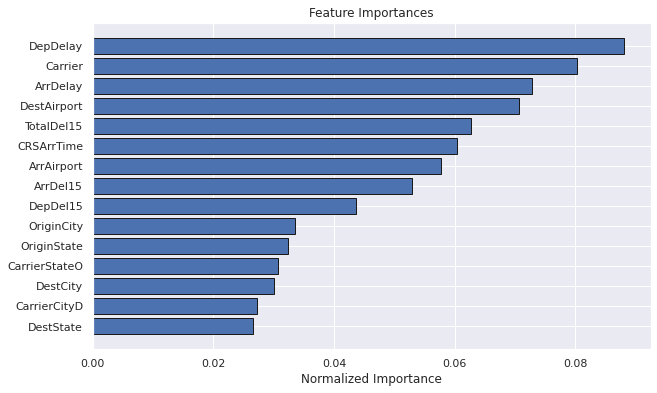

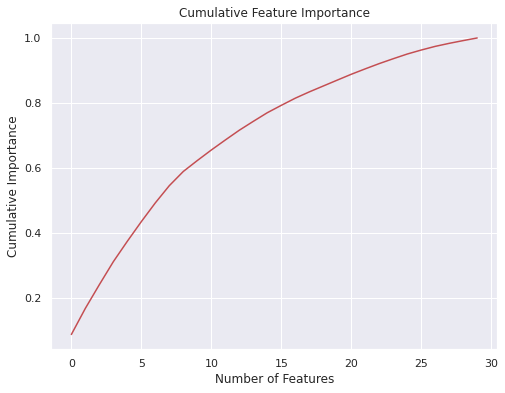

22 features required for 0.90 of cumulative importance


In [47]:
norm_feature_importances = plot_feature_importances(feature_importances_lgb)

In [50]:
def objective(trial):
  oof_f1 = []
  oof_predictions = []

  param={}
  param['n_estimators'] = 10000
  param['min_child_samples'] = trial.suggest_int("min_child_samples",1,32)
  param['learning_rate'] = trial.suggest_float("learning_rate", 0.01, 0.3,log=True)
  param["max_depth"] =  9
  param["min_gain_to_split"] = trial.suggest_float("min_gain_to_split", 0, 1)
  param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)


  fold= KFold(n_splits=5)
  i=1
  for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LGBMClassifier(**param,random_state=32)

    
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    preds=model.predict(X_test)
    oof_f1.append(roc_auc_score(y_test,preds))

  return np.mean(oof_f1)

In [52]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
print(study.best_params)

[I 2022-07-05 13:00:42,078] A new study created in memory with name: no-name-69ade2d1-2196-4672-a609-88a2745f0d9f
[I 2022-07-05 13:01:25,422] Trial 0 finished with value: 0.993120363377993 and parameters: {'min_child_samples': 32, 'learning_rate': 0.0800723519617568, 'min_gain_to_split': 0.20370933569900285, 'colsample_bytree': 0.25569449284320633}. Best is trial 0 with value: 0.993120363377993.
[I 2022-07-05 13:02:16,602] Trial 1 finished with value: 0.999488903394256 and parameters: {'min_child_samples': 24, 'learning_rate': 0.03849753772135648, 'min_gain_to_split': 0.41941733930699465, 'colsample_bytree': 0.2743882453686229}. Best is trial 0 with value: 0.993120363377993.
[I 2022-07-05 13:02:51,460] Trial 2 finished with value: 0.9983781490416515 and parameters: {'min_child_samples': 21, 'learning_rate': 0.06697417215582495, 'min_gain_to_split': 0.8683270221545965, 'colsample_bytree': 0.27168221399314474}. Best is trial 0 with value: 0.993120363377993.
[I 2022-07-05 13:03:36,891] Tr

{'min_child_samples': 1, 'learning_rate': 0.2303104865806185, 'min_gain_to_split': 0.2743675200760871, 'colsample_bytree': 0.10590804885782068}


In [53]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 20
Best trial:
  Value: 0.9760561931082792
  Params: 
    min_child_samples: 1
    learning_rate: 0.2303104865806185
    min_gain_to_split: 0.2743675200760871
    colsample_bytree: 0.10590804885782068


In [56]:
lgb_oof_predictions=[]

oof_f1 = []
param = trial.params



fold=KFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LGBMClassifier(**param)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    preds=model.predict(X_test)
    print("err: ",roc_auc_score(y_test,preds))
    oof_f1.append(roc_auc_score(y_test,preds))

err:  0.9882060324601092
err:  0.9971682375423592
err:  0.9879518072289157
err:  0.9942528735632183
err:  0.9862053571428573


In [58]:
# Evaluation Metrics
print('Accuracy: ', accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
# Print the confusion matrix
cm = confusion_matrix(y_test, preds)
print (cm)

Accuracy:  0.9995882352941177
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33600
           1       0.99      0.97      0.98       400

    accuracy                           1.00     34000
   macro avg       1.00      0.99      0.99     34000
weighted avg       1.00      1.00      1.00     34000

[[33597     3]
 [   11   389]]


In [59]:
probab = model.predict_proba(X_test)

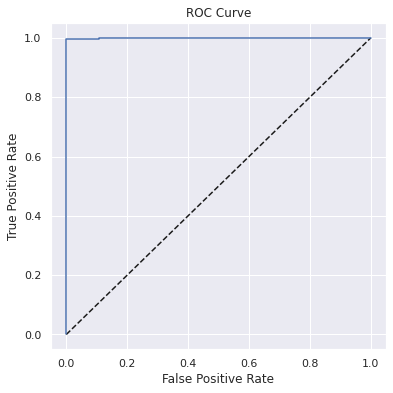

In [60]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [62]:
auc = roc_auc_score(y_test,probab[:,1])
print('AUC: ' + str(auc))

AUC: 0.9996454613095239
